# 실습 - Gradient Boosting 을 이용한 Titanic 호의 생존 예측

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_titanic = pd.read_csv("datasets/titanic.csv")

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [5]:
mean_age = df_titanic['Age'].mean()

In [6]:
df_titanic['Age'].fillna(mean_age, inplace=True)

In [7]:
df_titanic = pd.get_dummies(df_titanic)

In [8]:
Y = df_titanic['Survived']
X = df_titanic.drop(['Survived'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.8435754189944135

In [13]:
clf.feature_importances_

array([0.13934135, 0.13308164, 0.05992134, 0.00957371, 0.15569253,
       0.15152171, 0.32308561, 0.00831582, 0.00862661, 0.01083968])

In [14]:
feature_imp = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending=False)

In [15]:
feature_imp

Sex_male      0.323086
Fare          0.155693
Sex_female    0.151522
Pclass        0.139341
Age           0.133082
SibSp         0.059921
Embarked_S    0.010840
Parch         0.009574
Embarked_Q    0.008627
Embarked_C    0.008316
dtype: float64

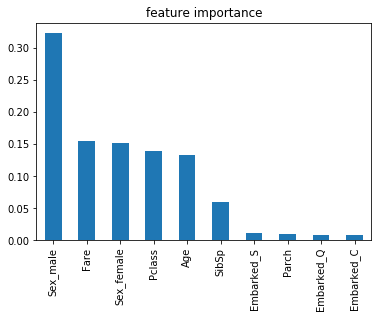

In [16]:
feature_imp.plot(kind='bar', title='feature importance')